In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import random
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

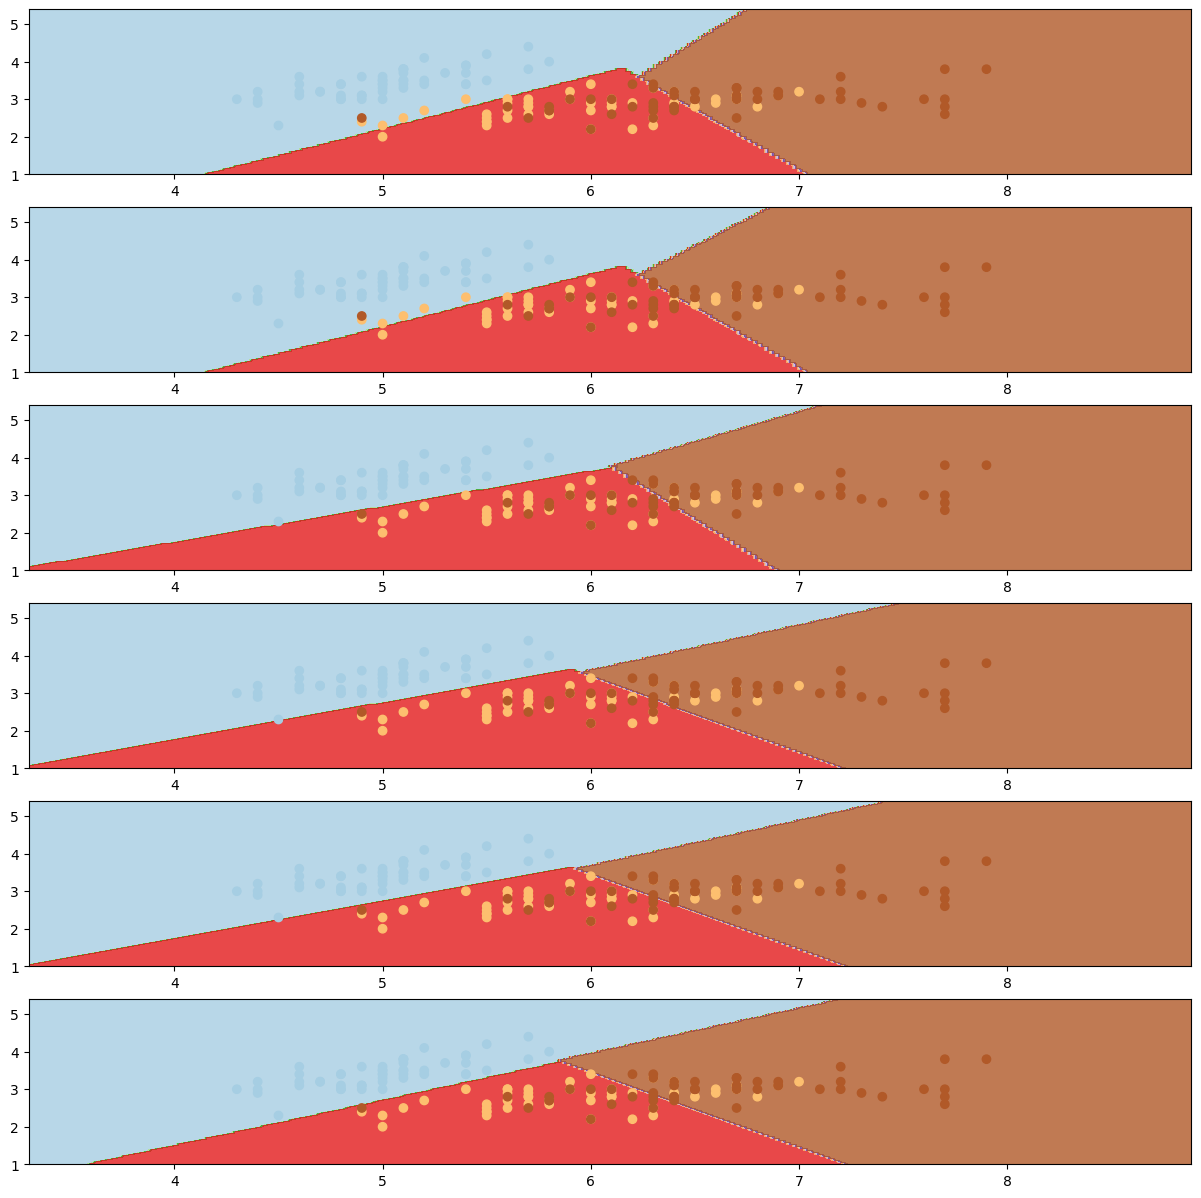

In [47]:

cvalues = [0.001,0.01,0.1,1,10,100]
figure, axis = plt.subplots(len(cvalues),figsize=(15, 15))
for index, x in enumerate(cvalues):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0 # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=x,gamma=0).fit(X, y)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axis[index].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    axis[index].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

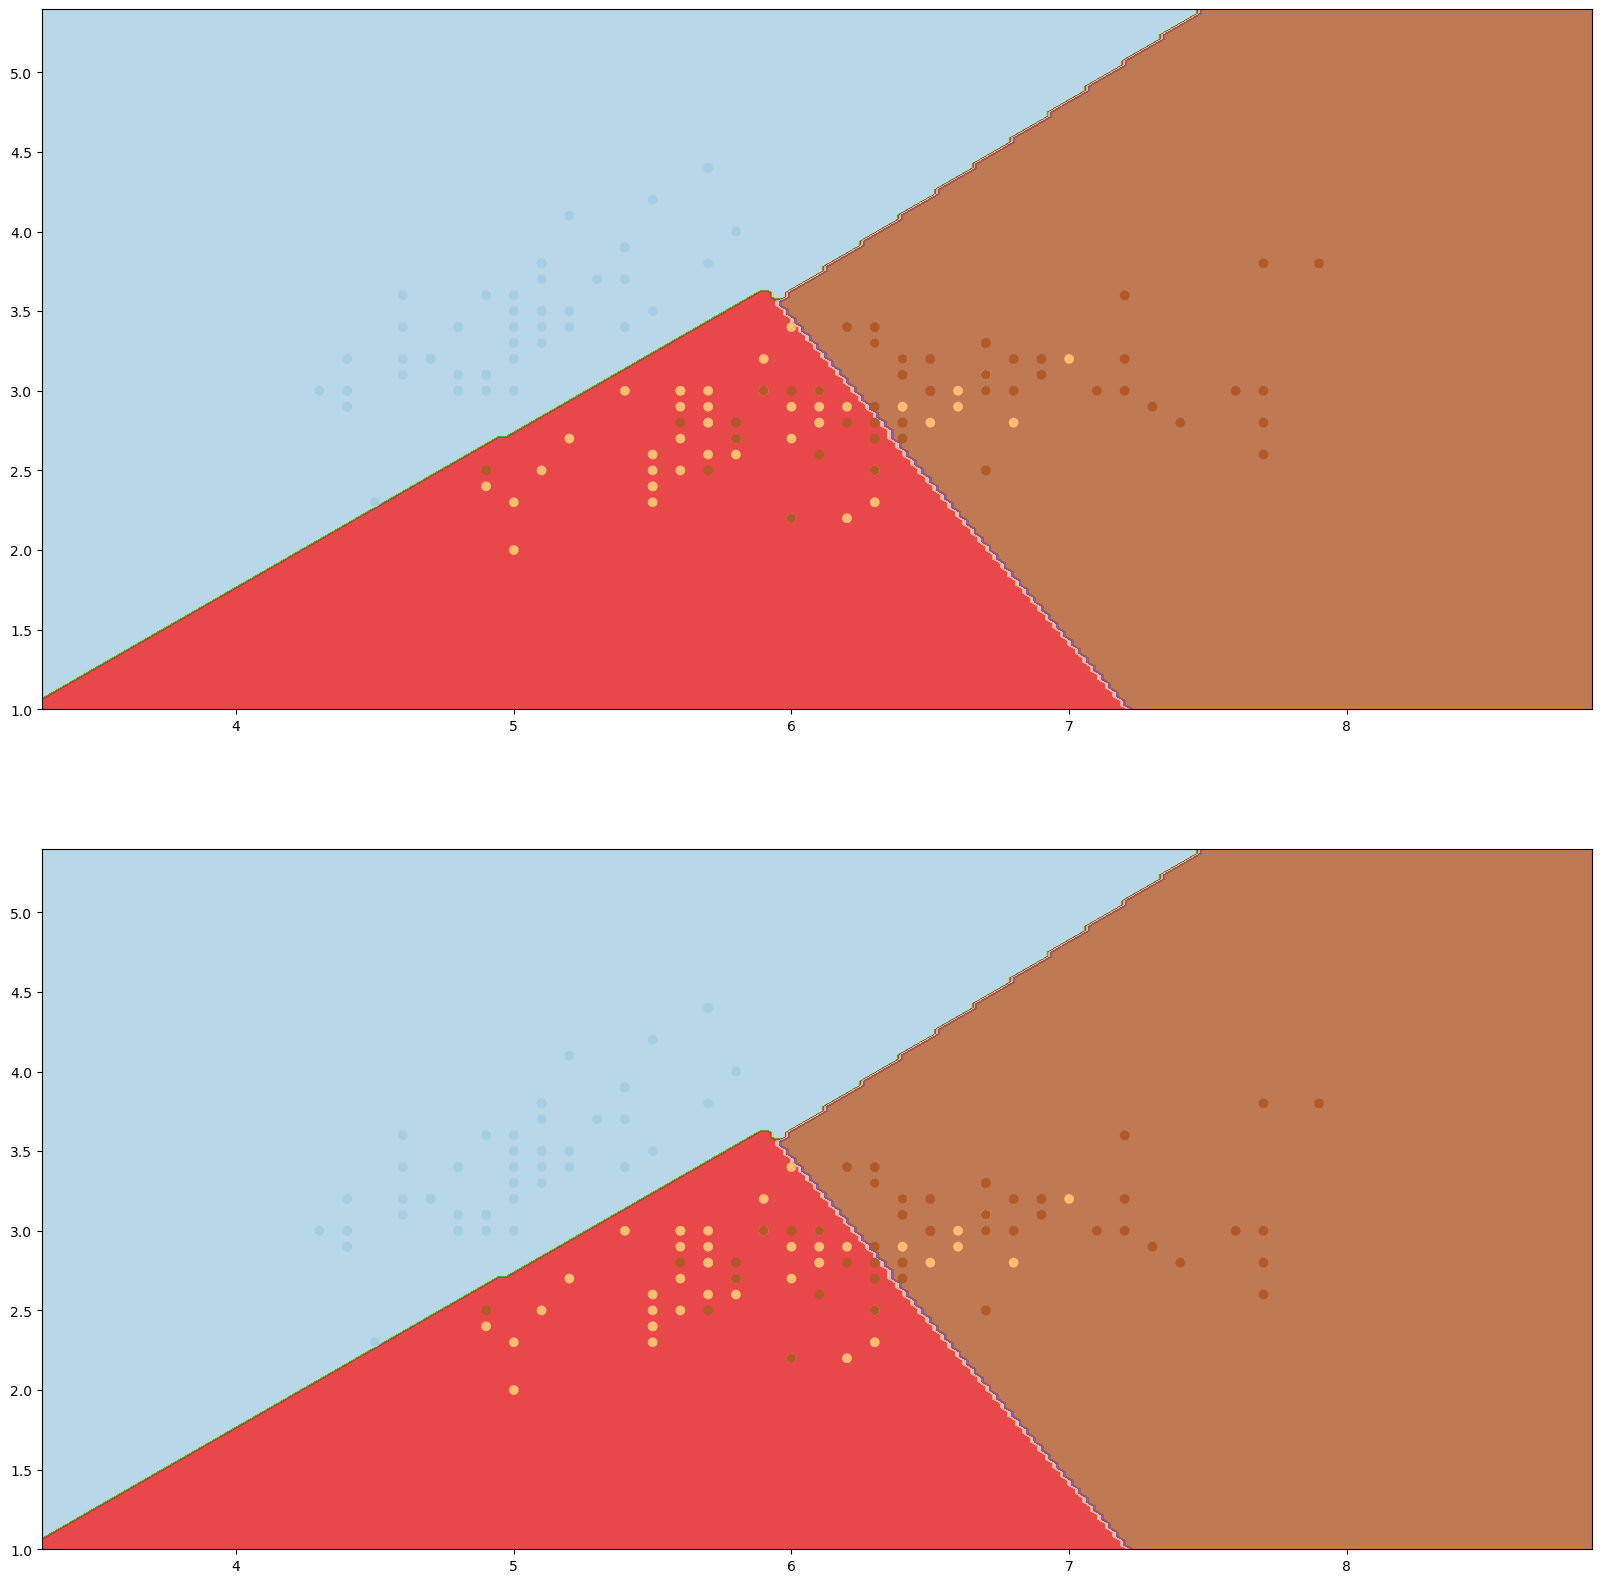

In [48]:
figure, axis = plt.subplots(2,figsize=(20, 20))



svc = svm.SVC(kernel='linear', C=1.0 ,gamma=0).fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axis[0].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
axis[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

supportVectorsList = svc.support_vectors_.copy()
random.shuffle(supportVectorsList)
supportVectorsList[:len(supportVectorsList)//4]

newX = list((tuple(i) for i in X))
vectorsToRemove = list((tuple(i) for i in supportVectorsList))
newY = list(y)

for vector in vectorsToRemove:
    if vector in newX:
        index = newX.index(vector)
        newX.remove(vector)
        newY.pop(index)


svc2 = svm.SVC(kernel='linear', C=1.0 ,gamma=0).fit(newX, newY)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


axis[1].contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
axis[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

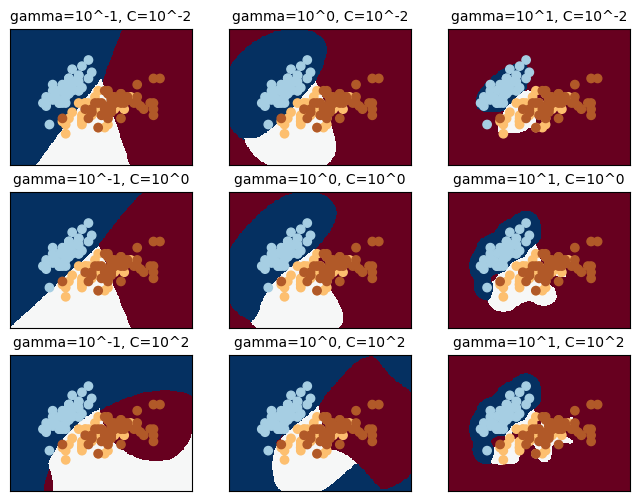

In [54]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

In [ ]:
#Import Library
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
train=pd.read_csv('train.csv')
train_y=train['Loan_Status']
train_x=train.drop(["Loan_Status"],axis=1)

test=pd.read_csv('test.csv')
test_y=test['Loan_Status']
test_x=test.drop(["Loan_Status"],axis=1)

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(train_x, train_y)
predicted= support.predict(test_x)
score=accuracy_score(test_y,predicted)
print("Your Model Accuracy is", score)
train.to_csv( "pred.csv")

Your Model Accuracy is 0.6949152542372882
